# Graph Analysis Script
This script will contain the following analyses:
* Spectral Graph Partitioning
* Node Degree Centrality Analysis
* Hierarchy Index Calculation
* Rich Club Coefficient Calculation
* Triangulative Potential Analysis

## Creating the required environment (skip if already done)

Running the following cell will create a file graphs.yml that can be used to setup a conda environment containing the required packages. If you already downloaded the file from my GitHub, skip the next cell and create the env directly from it.

In [ ]:
%%writefile graphs.yml
name: graphs
channels:
  - conda-forge
  - defaults
dependencies:
  - python=3.6
  - jupyter
  - imageio
  - imageio-ffmpeg
  - matplotlib
  - scikit-image
  - opencv
  - networkx
  - pandas
  - statsmodels

### Environment Creation
To create the environment, open the terminal, go to the directory where you stored the graphs.yml file (the directory of the notebook) and type
conda env create -f graphs.yml
After running this command you have to activate the environment (Linux/MacOS: conda activate graphs, Windows: activate graphs) and then reopen the notebook in that environment.

### Additional Imports:
* To calculate the Rich Club coefficient (particularly the random degree distribution graphs), the package random_graph needs to be imported in the terminal by typing ``` pip install git+https://github.com/jamesross2/random_graph ```


In [1]:
import os
import cv2
import json
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import glob
import scipy.cluster.vq as clusters
import scipy.sparse as sparse
import warnings
import random_graph
warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy.special import binom as nchoosek
from sklearn.preprocessing import normalize
from pandas.plotting import autocorrelation_plot as AC_plot 
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import acf
from skimage.filters import gaussian
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LinearSegmentedColormap


OG_DATA_PATH = './'
GIT_DATA_PATH = './Data Exploration/'
GIT_PROCESSED_DATA_PATH = './Results/'
GIT_GRAPH_PATH = './Results/Graphs/'
RESSOURCES_PATH = './Ressources/'

# Reset the Datapath since the data is not yet on Git, comment out if data is on Git 
DATA_PATH = '/Volumes/EXTENSION/Uni/Study Project/Data Exploration/'

PROCESSED_DATA_PATH = '/Volumes/EXTENSION/Uni/Study Project/Results/'
GRAPH_DATA_PATH = '/Volumes/EXTENSION/Uni/Study Project/Results/Graphs/'
# Getting the Folder without hidden files in ascending order 
DATA_FOLDER = sorted([f for f in os.listdir(DATA_PATH) if not f.startswith('.')], key=str.lower)
PROCESSED_DATA_FOLDER = sorted([f for f in os.listdir(PROCESSED_DATA_PATH) if not f.startswith('.')], key=str.lower)
GIT_PROCESSED_DATA_FOLDER = sorted([f for f in os.listdir(GIT_PROCESSED_DATA_PATH) if not f.startswith('.')], key=str.lower)
GIT_GRAPH_FOLDER = sorted([f for f in os.listdir(GIT_GRAPH_PATH) if not f.startswith('.')], key=str.lower)

#houselist 
house_file = RESSOURCES_PATH + 'building_collider_list.csv'
try:
    houselist = pd.read_csv(house_file)
except:
    print('HouseList could not be loaded!')
    
    
fontsize = 20

green = [0.40,0.80,0.42]
blue = [0.27,0.38,0.99]

### Extracting all subject IDs from the data folder

In [2]:
subIDs = []
for sub in DATA_FOLDER:
    if sub[0].isdigit():
        subIDs.append(int(sub[0:4]))
    else:
        pass
subIDs = np.unique(subIDs)
print(subIDs)

[1005 1008 1010 1011 1013 1017 1018 1019 1021 1023 1079 1080]


In [112]:
# custom subIDx
subIDs = [1008]


### Loading the edgelists and creating the graphs 
* Also including the analyses

Subject 1005 started - 1/12
smallest Eigenvalue is 0
Graph is fully connected


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
	Graph PNG saved


/Applications/anaconda3/envs/graphs/lib/python3.6/site-packages/ipykernel_launcher.py:400: RuntimeWarning: divide by zero encountered in true_divide


Subject 1008 started - 2/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved


/Applications/anaconda3/envs/graphs/lib/python3.6/site-packages/ipykernel_launcher.py:400: RuntimeWarning: invalid value encountered in true_divide


Subject 1010 started - 3/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
Subject 1011 started - 4/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
Subject 1013 started - 5/12
smallest Eigenvalue is 0
Graph is fully connected


/Applications/anaconda3/envs/graphs/lib/python3.6/site-packages/ipykernel_launcher.py:215: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
	Graph PNG saved


/Applications/anaconda3/envs/graphs/lib/python3.6/site-packages/ipykernel_launcher.py:400: RuntimeWarning: invalid value encountered in true_divide


Subject 1017 started - 6/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved


/Applications/anaconda3/envs/graphs/lib/python3.6/site-packages/ipykernel_launcher.py:400: RuntimeWarning: divide by zero encountered in true_divide


Subject 1018 started - 7/12
Subject 1018 has no data file!
Subject 1019 started - 8/12
Subject 1019 has no data file!
Subject 1021 started - 9/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved


/Applications/anaconda3/envs/graphs/lib/python3.6/site-packages/ipykernel_launcher.py:400: RuntimeWarning: invalid value encountered in true_divide


Subject 1023 started - 10/12
smallest Eigenvalue is 0
Graph is fully connected


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
	Graph PNG saved
Subject 1079 started - 11/12
Subject 1079 has no data file!
Subject 1080 started - 12/12
Subject 1080 has no data file!
Partitioning Dataframe saved
Hierarchy Dataframe saved
Rich Club Dataframe saved
Done


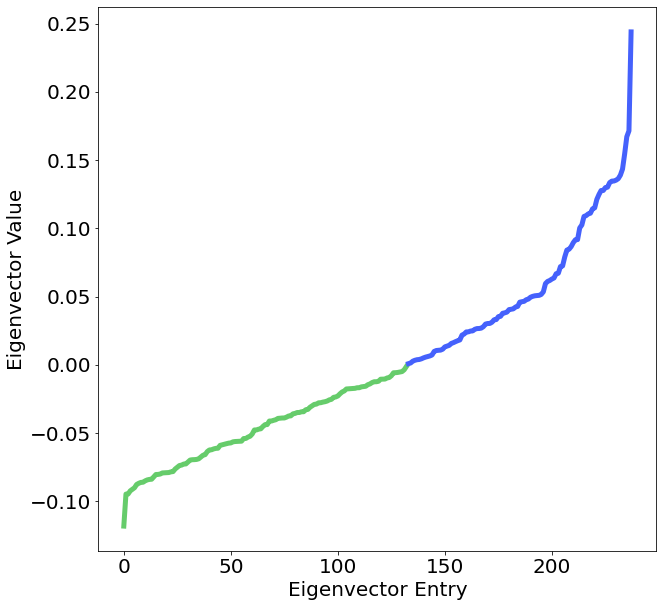

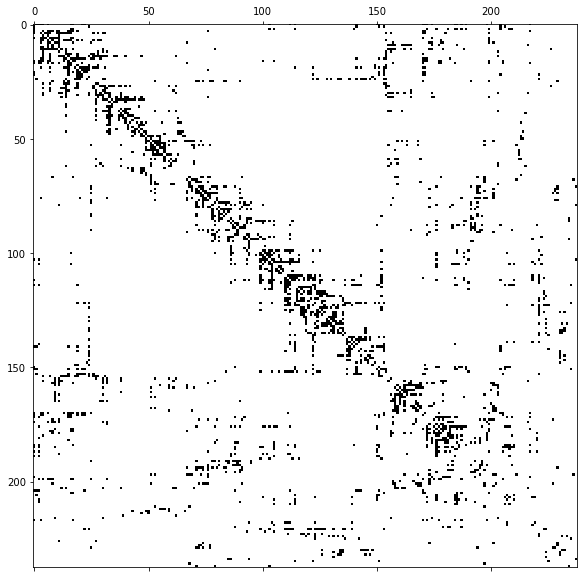

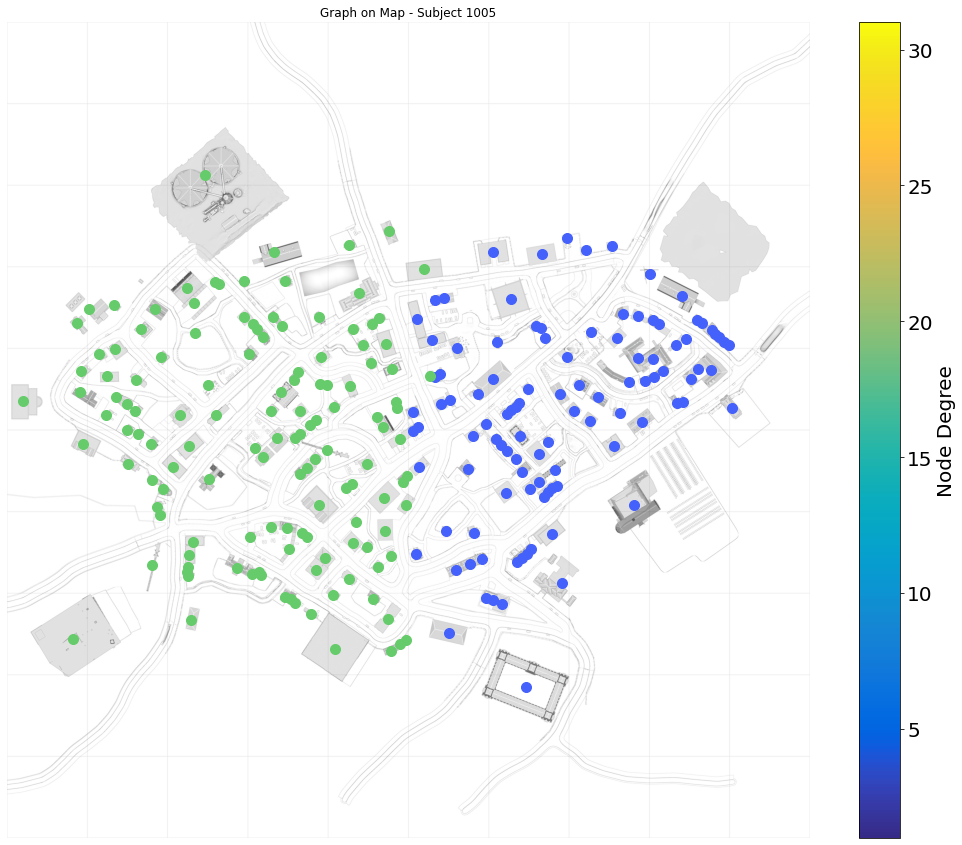

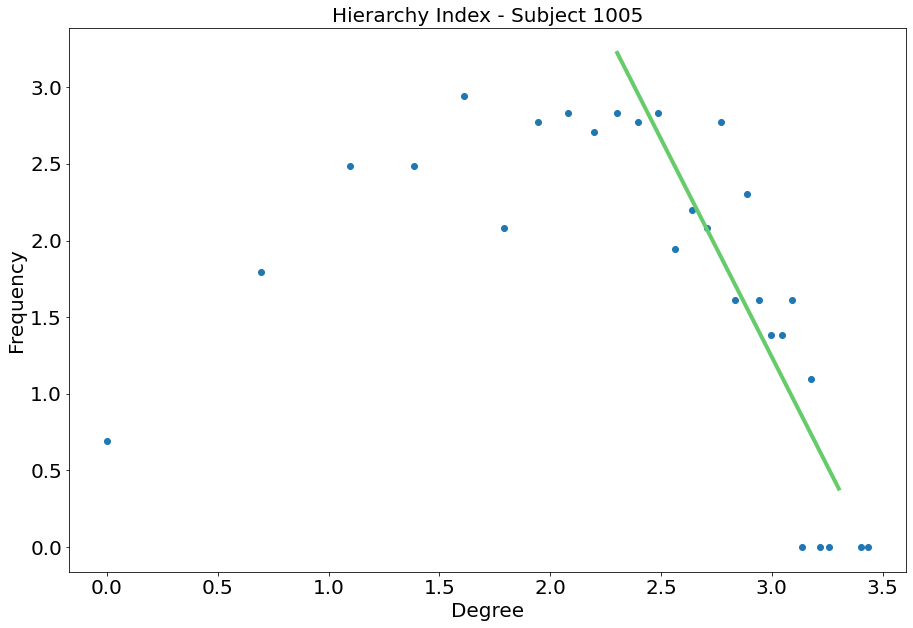

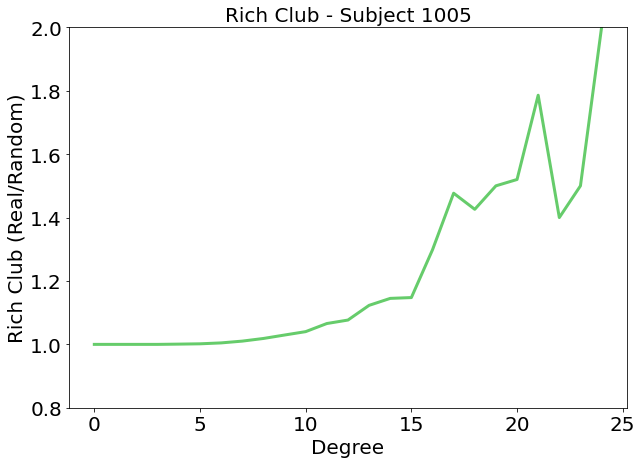

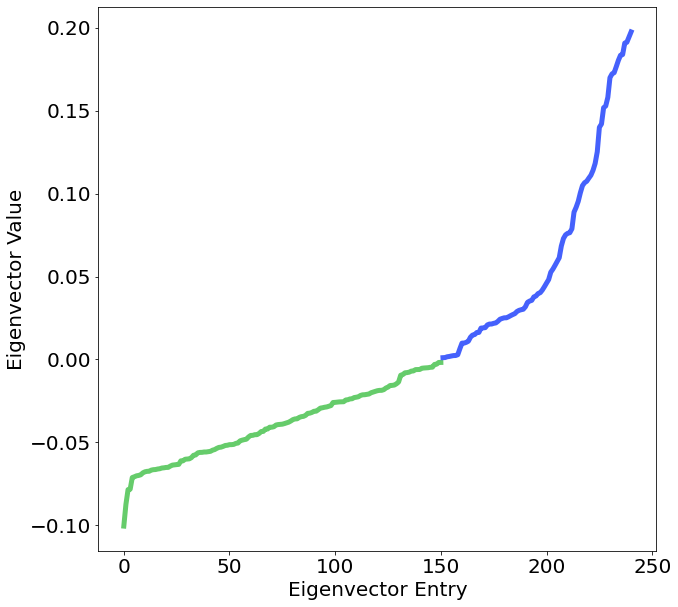

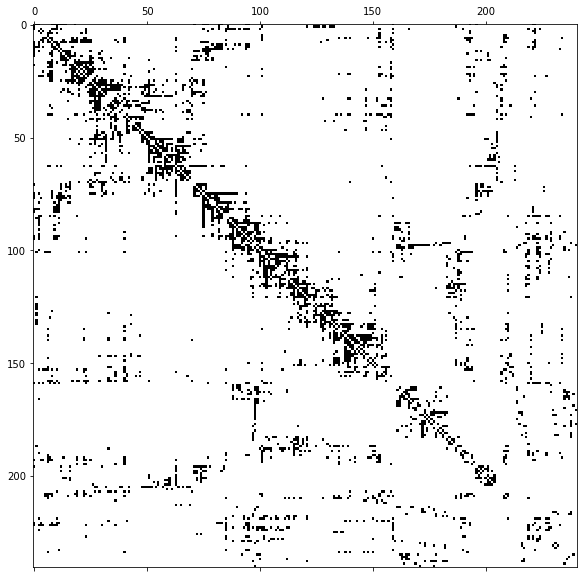

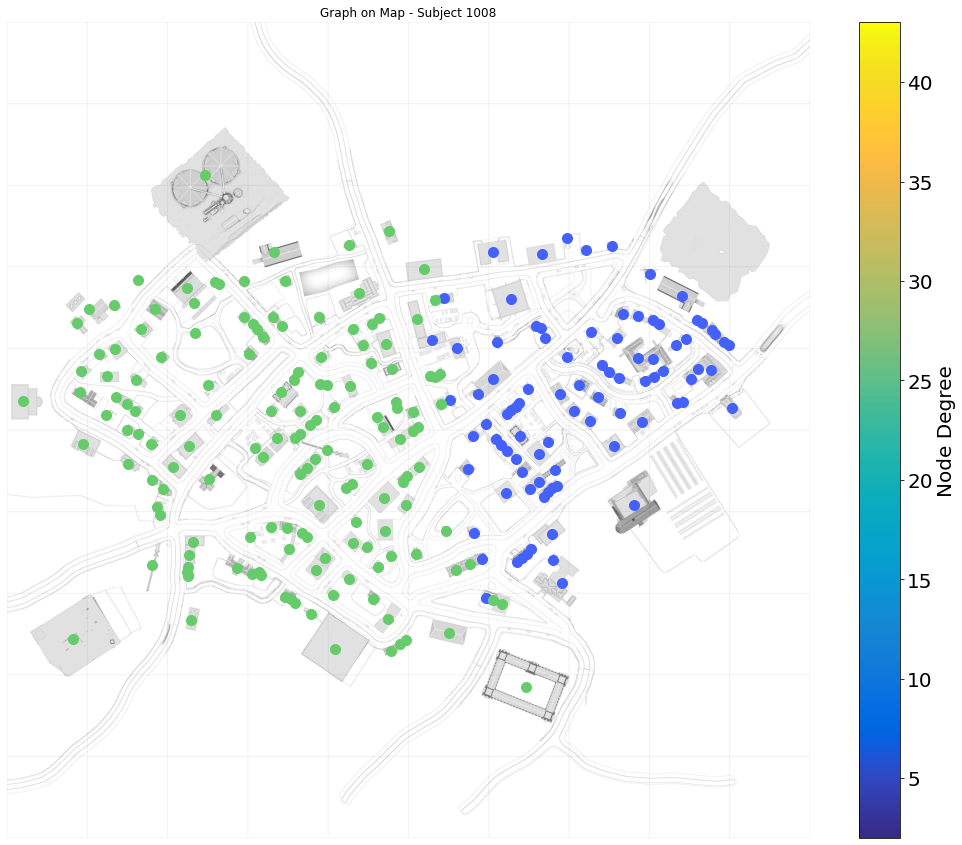

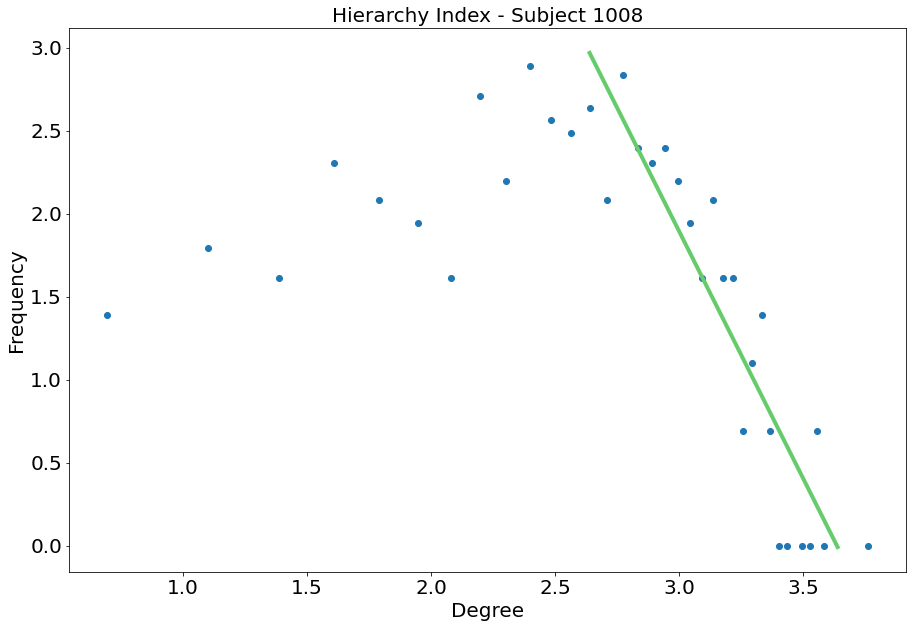

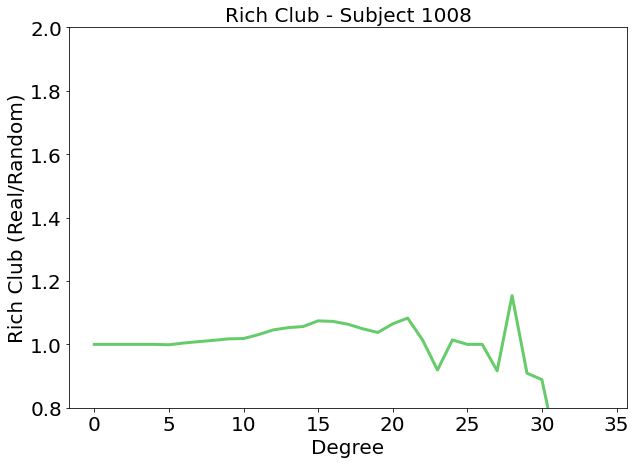

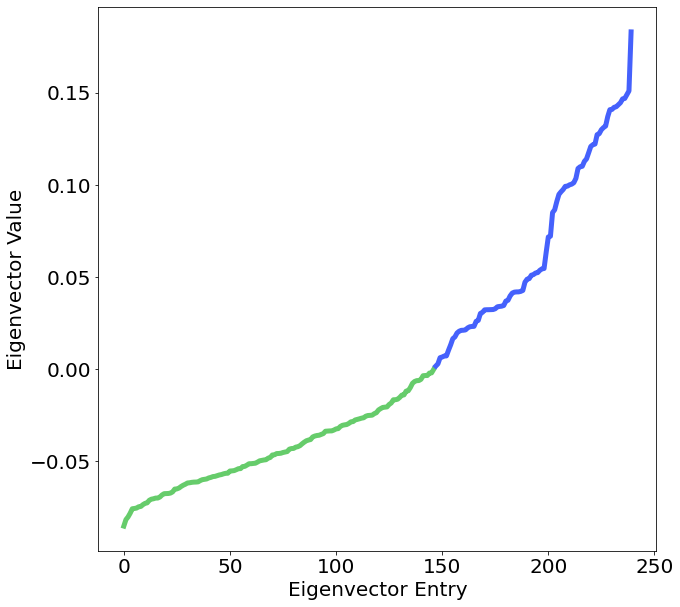

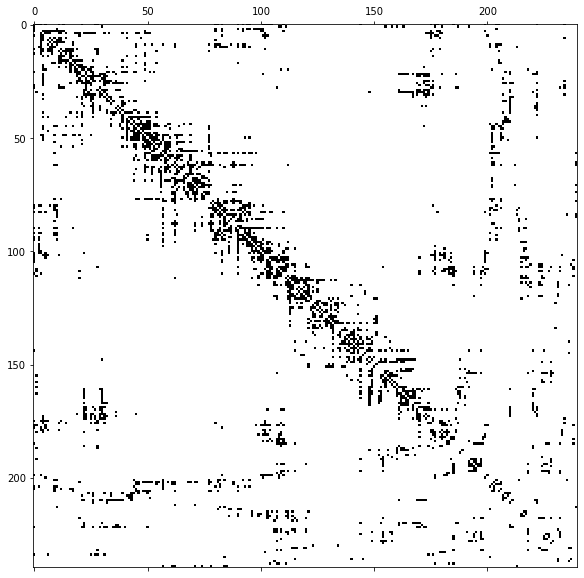

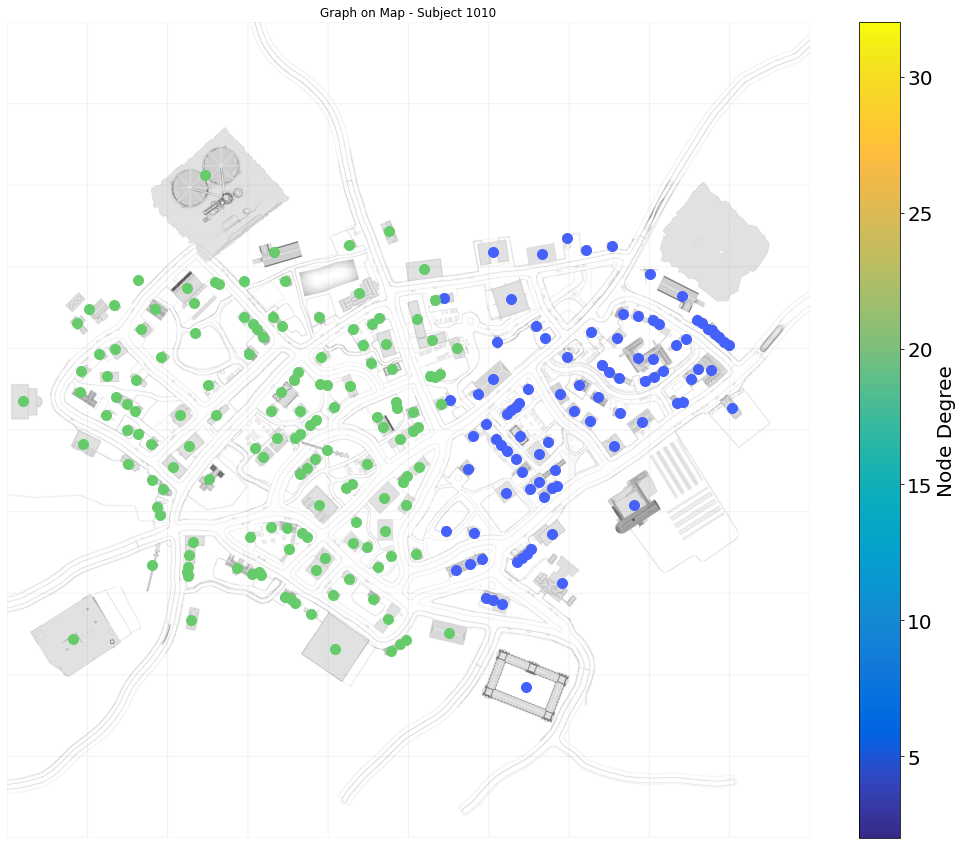

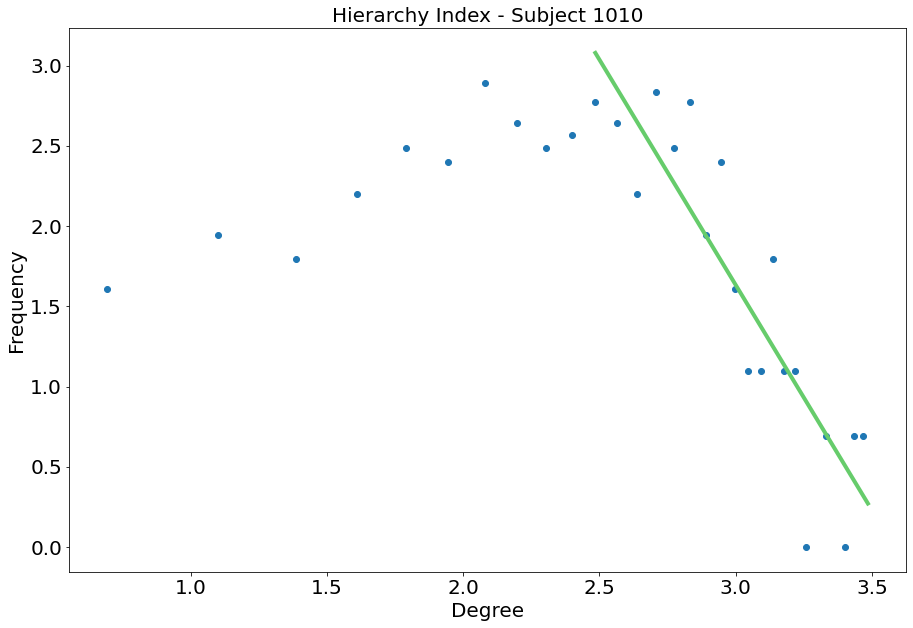

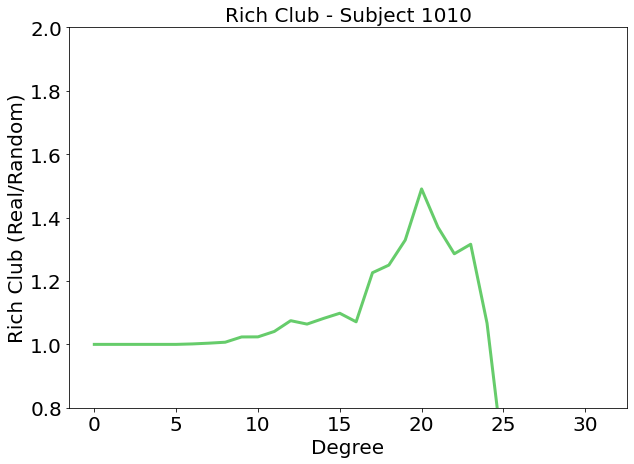

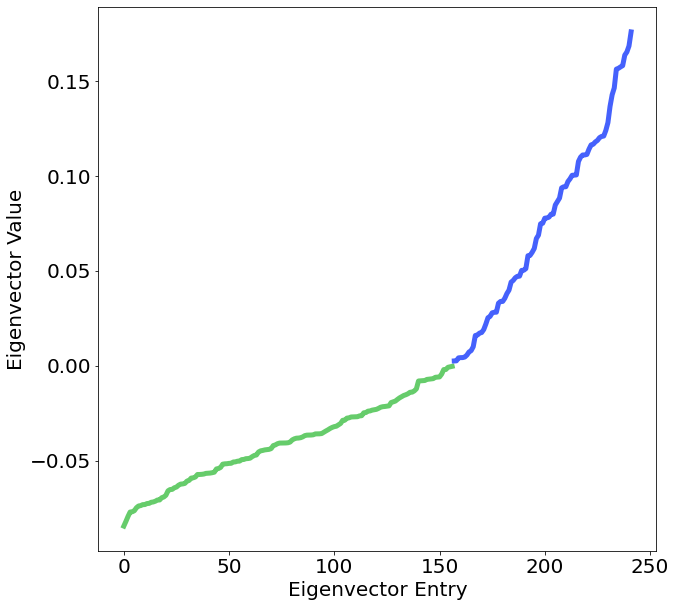

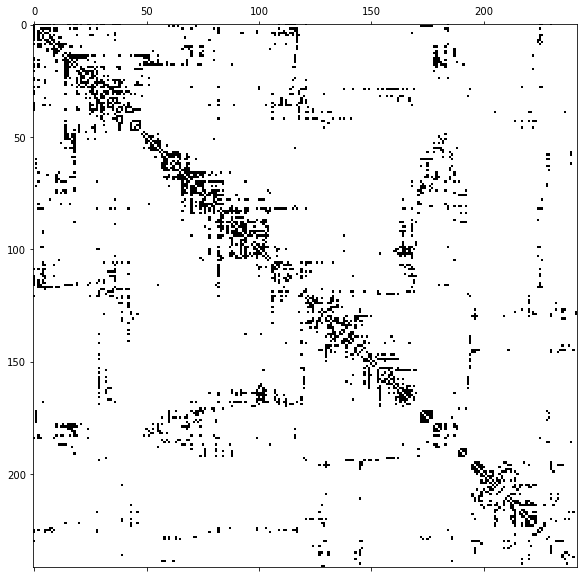

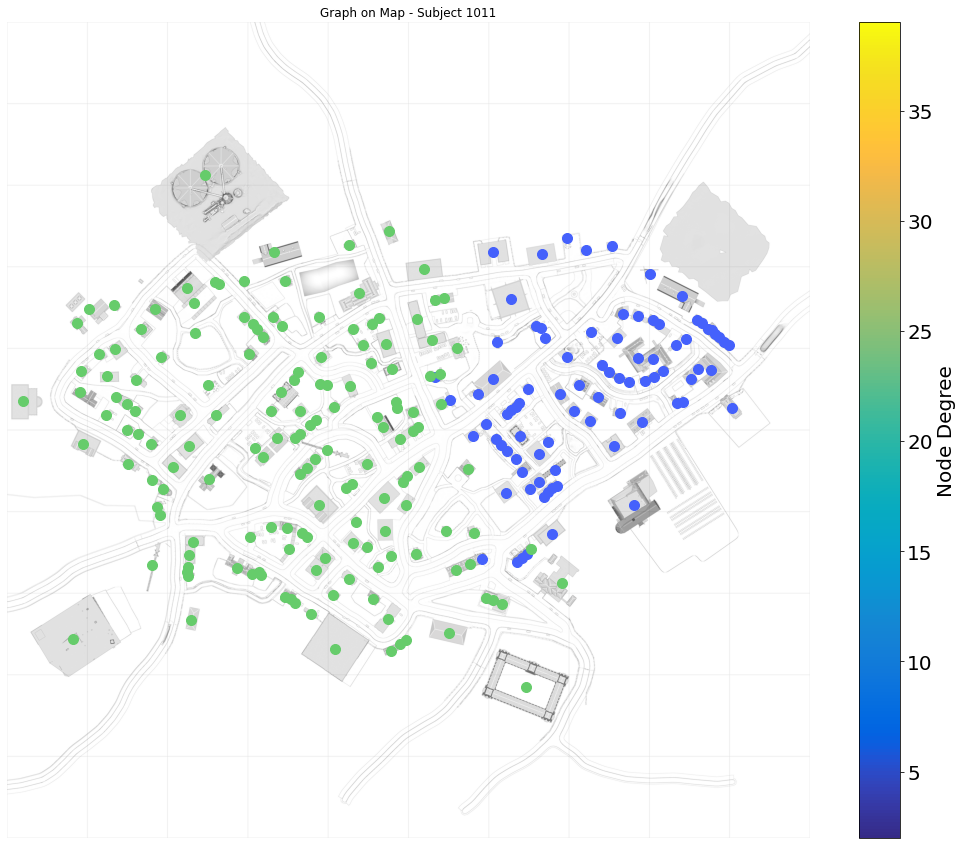

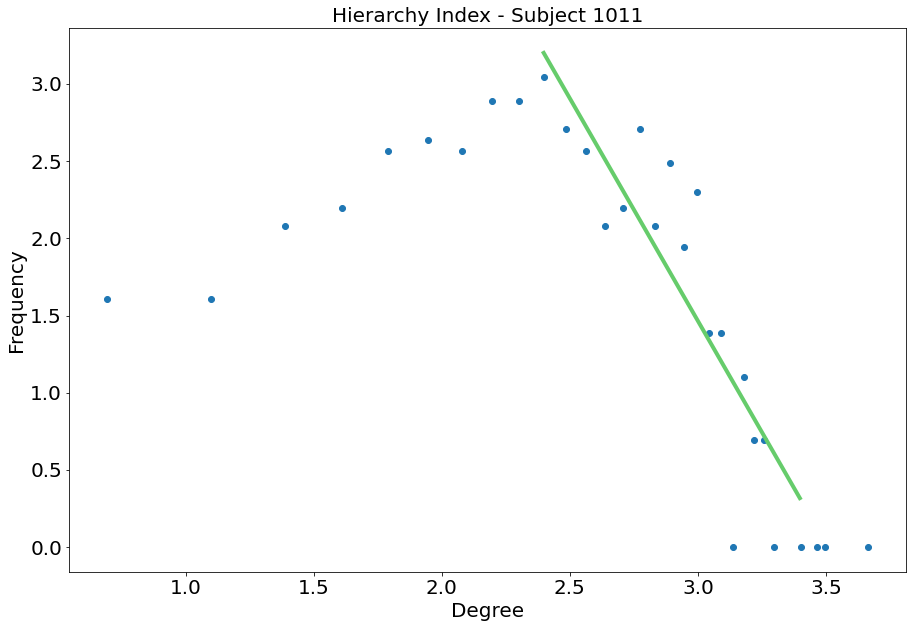

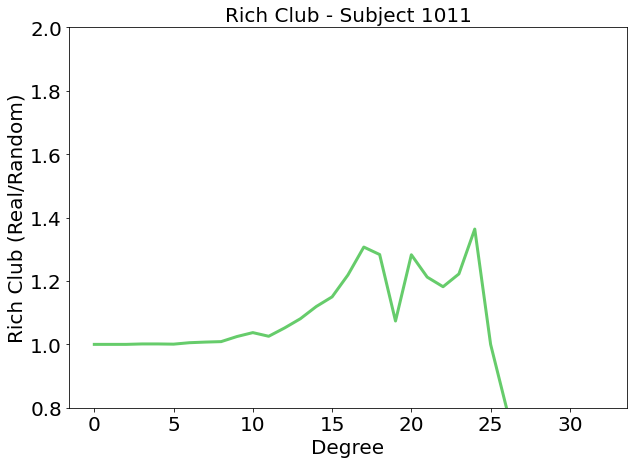

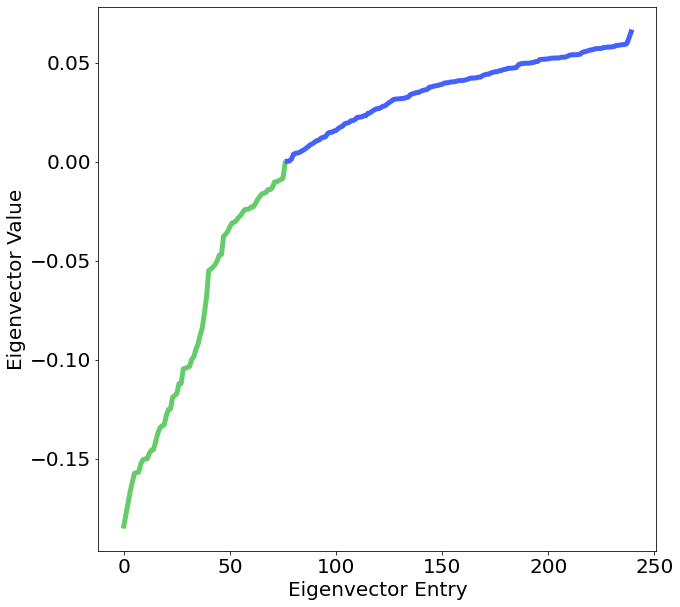

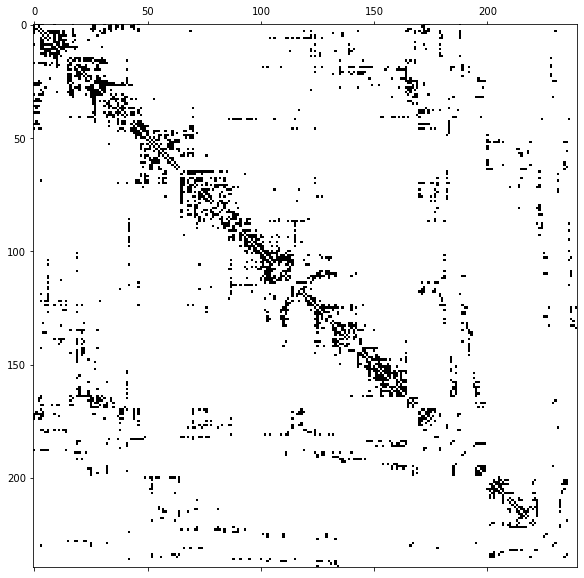

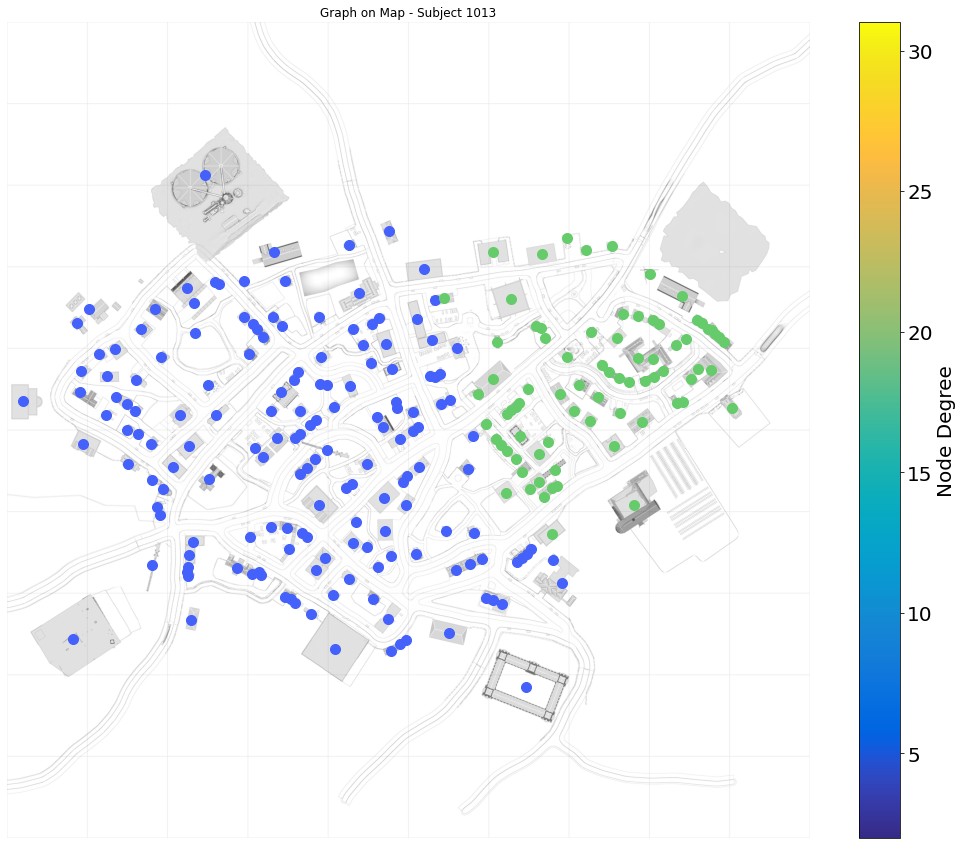

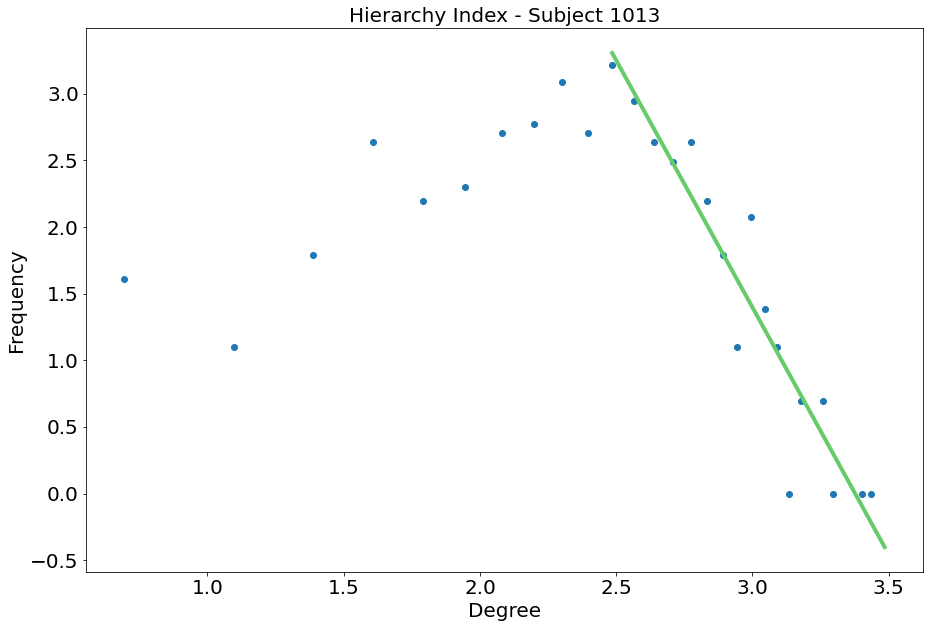

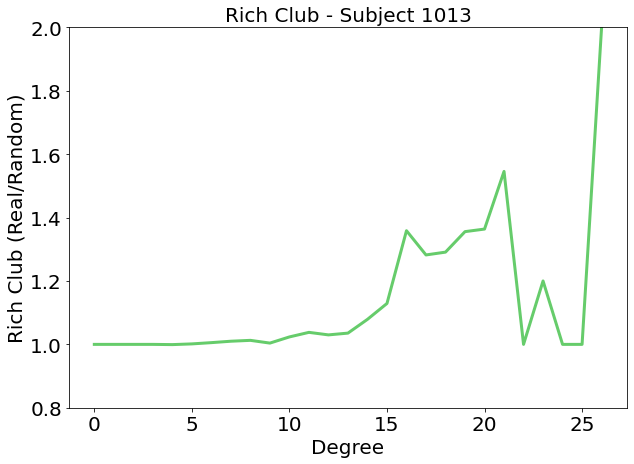

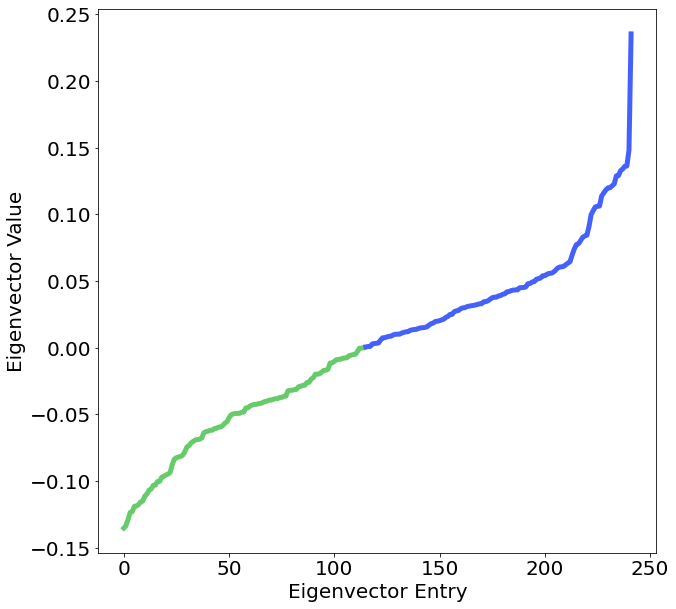

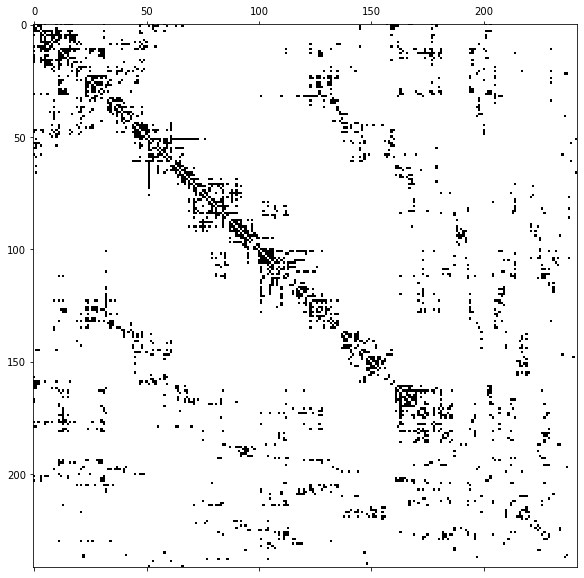

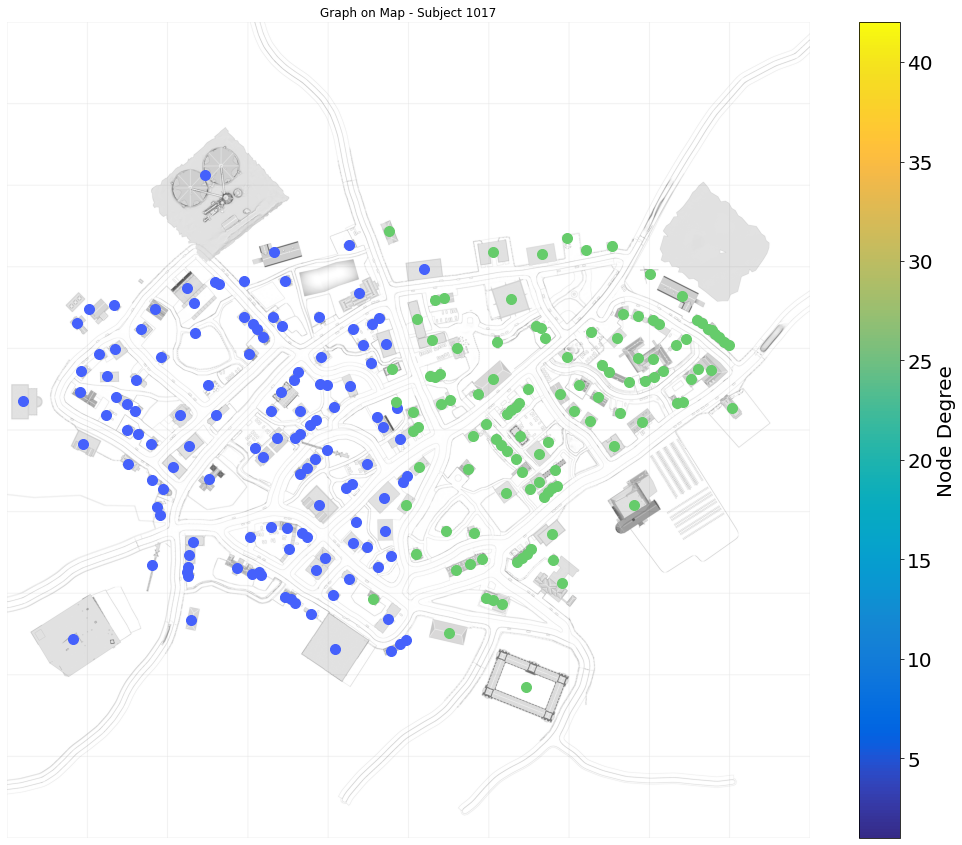

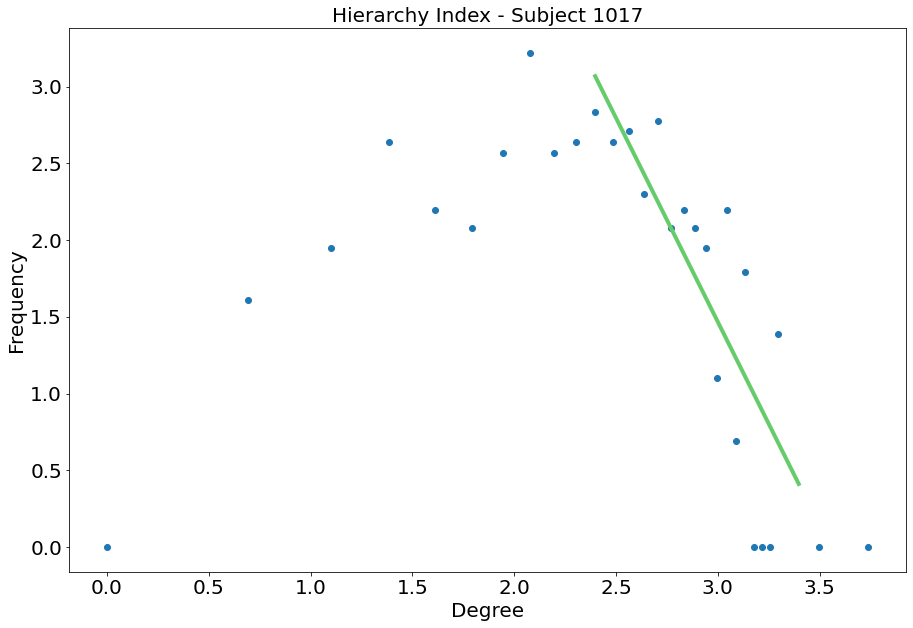

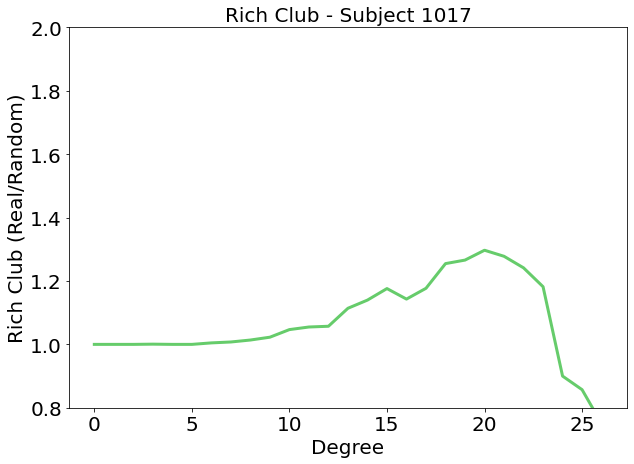

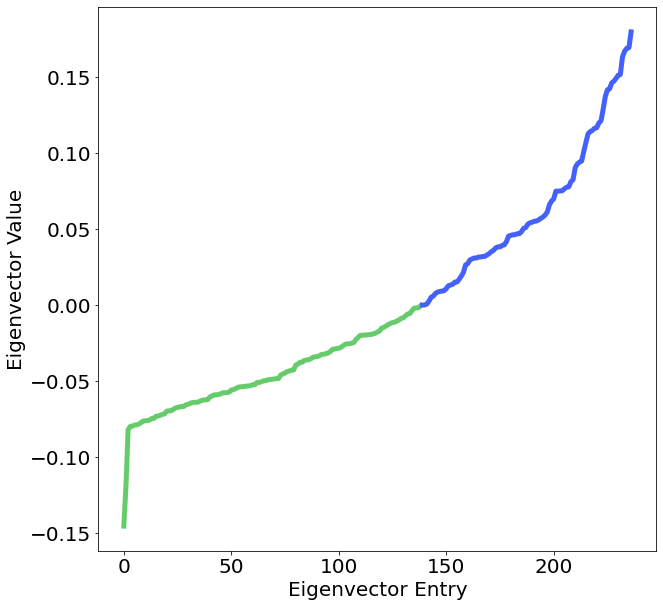

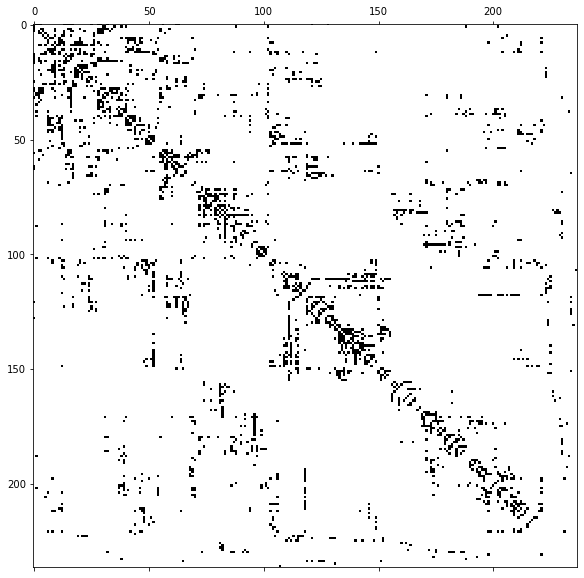

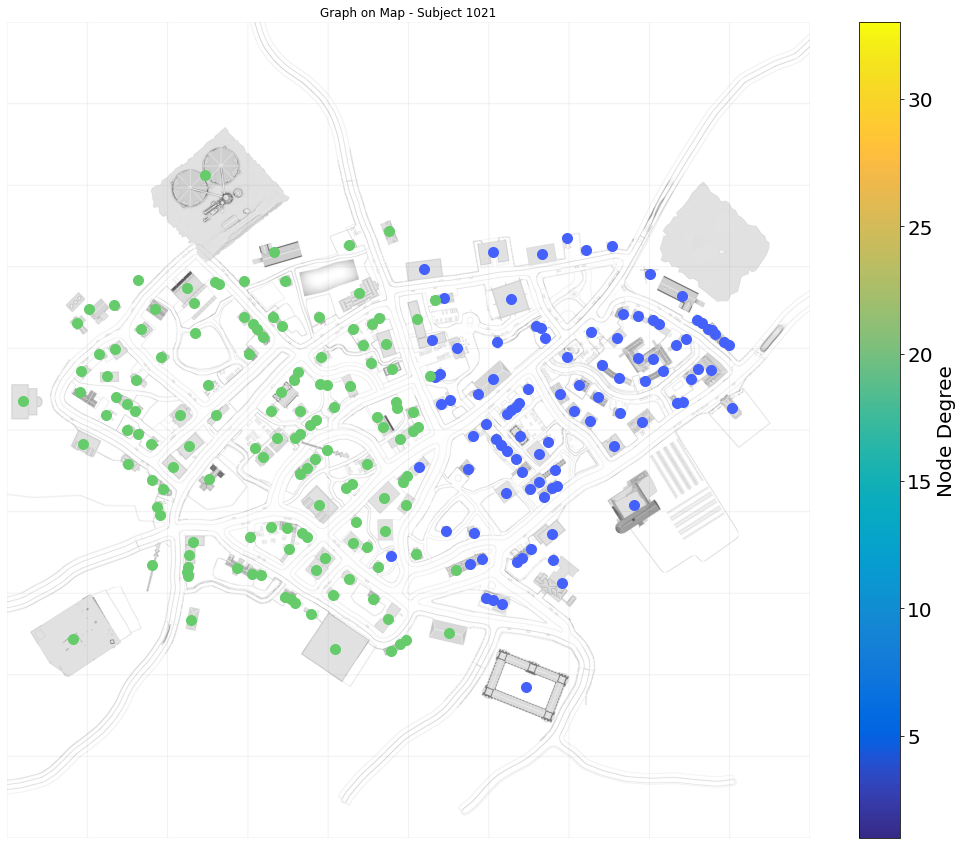

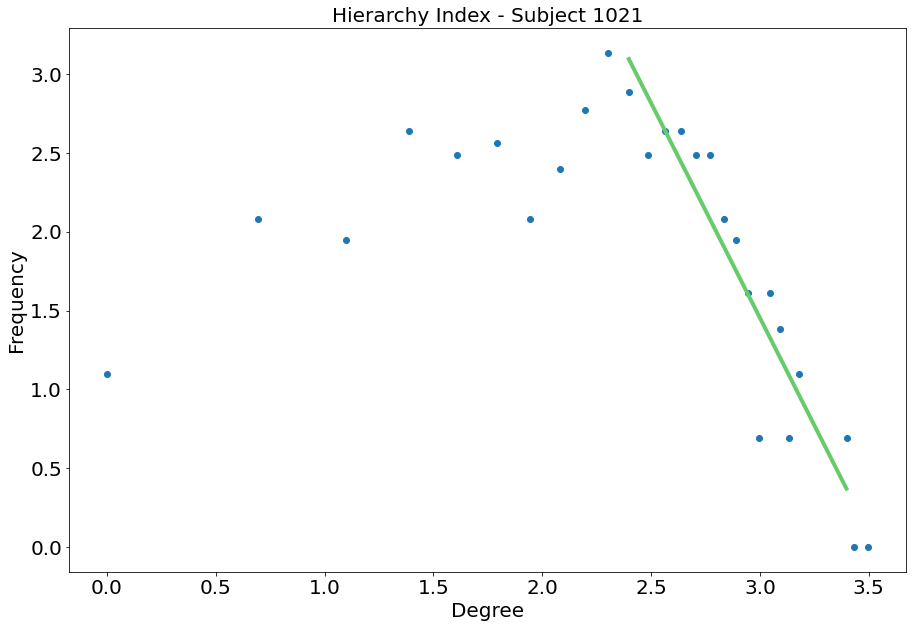

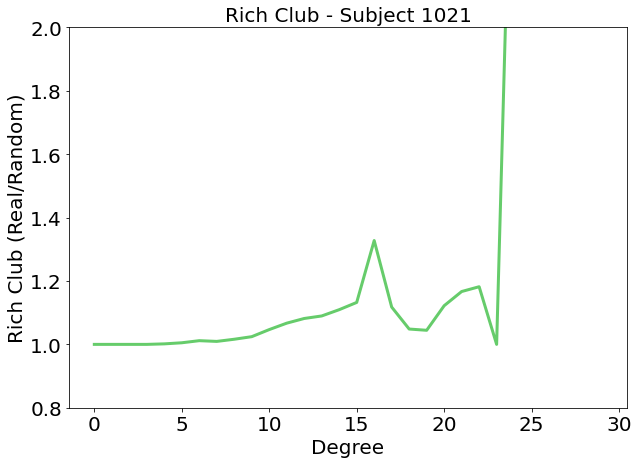

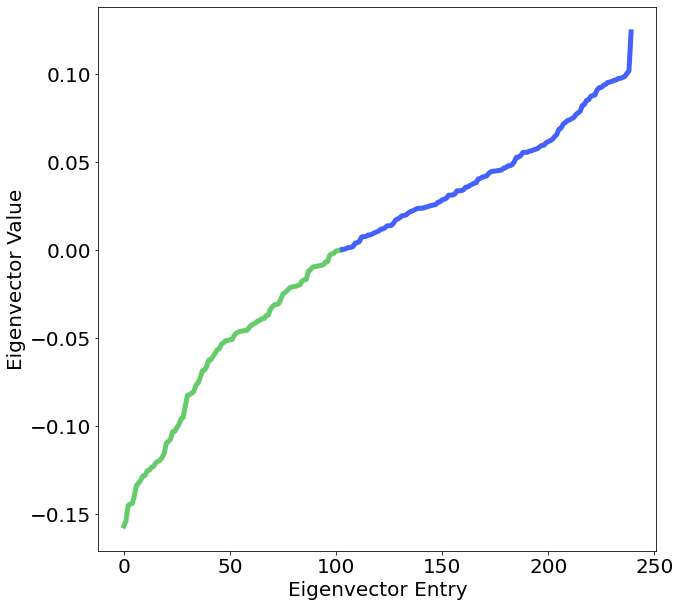

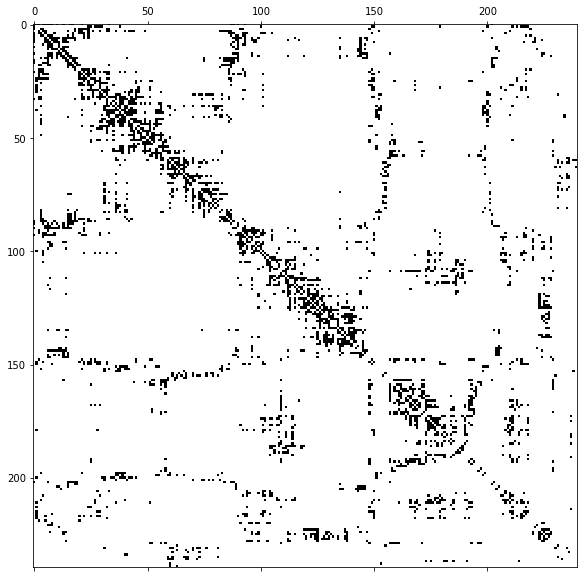

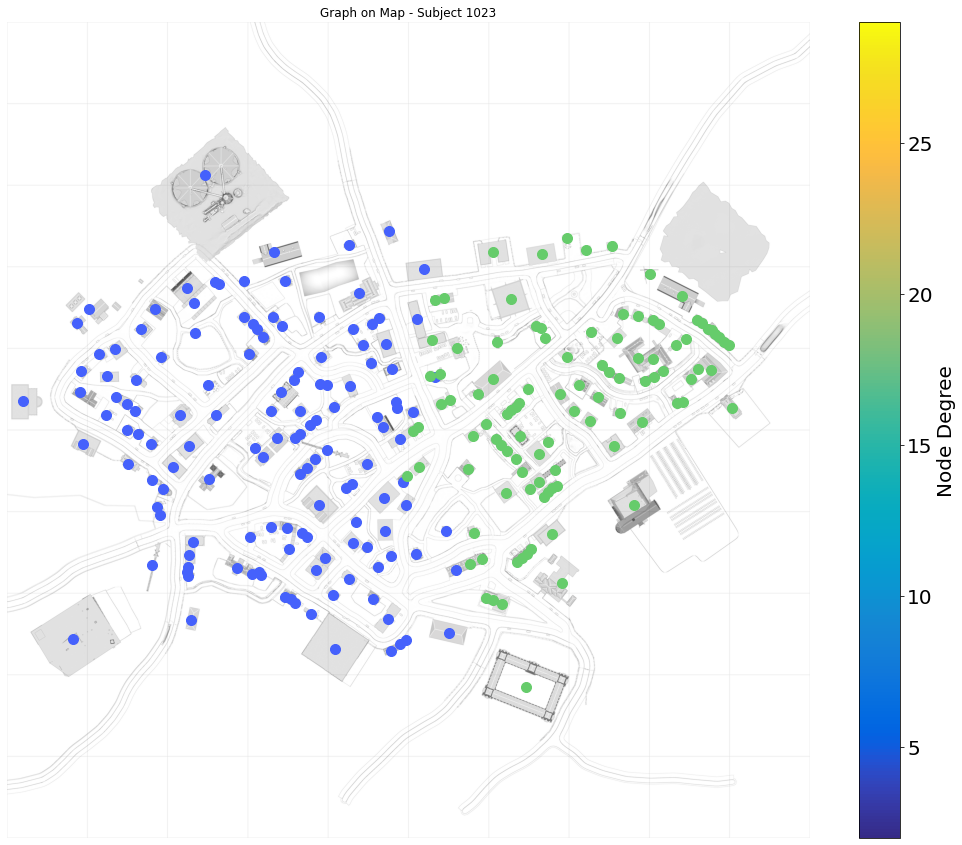

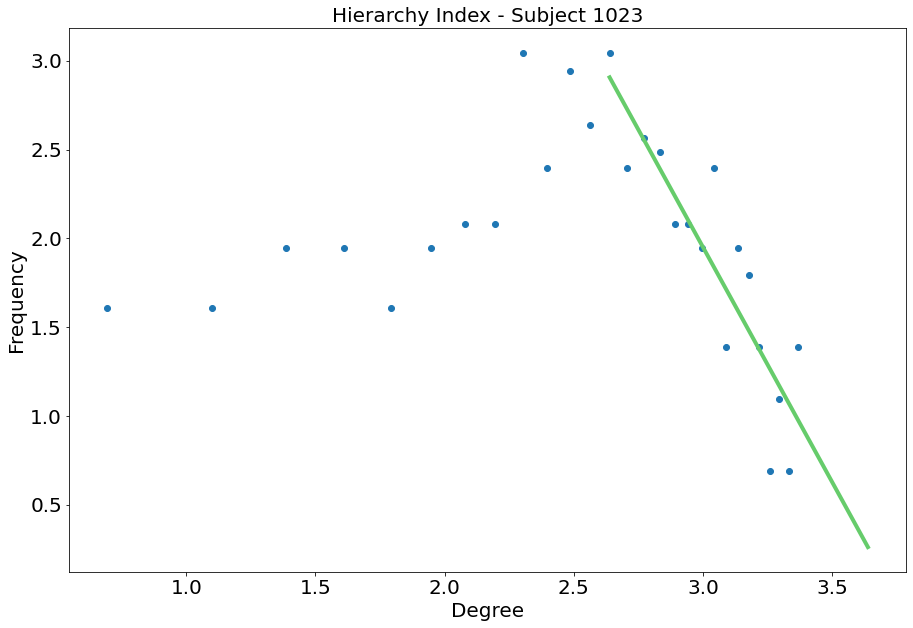

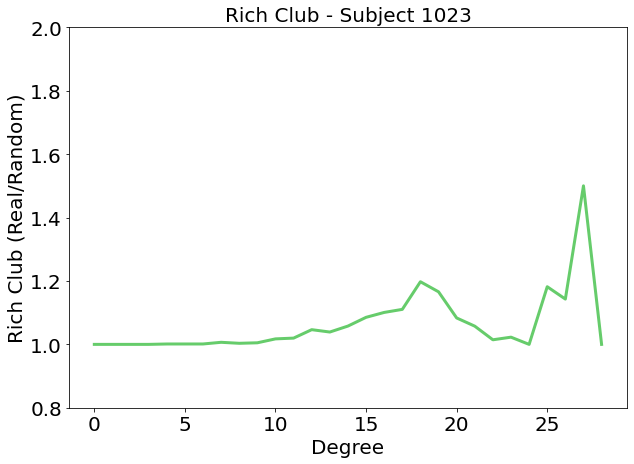

In [7]:
# --------- Preparation ---------
Plotting_bool = True # if you want to plot the graph
save_bool = True # if you want to save the respective figure
plot_edges_bool = False # if you want to plot the graph's edges
save_centrality = False # if you want to save the centrality dataframe (node degree) as csv 

calculate_Partitioning = True # if you want to calculate the graph partitioning
calculate_ND = False # if you want to calculate the node degree statistics
calculate_Hierarchy = True  # if you want to calculate the hierarchy index 
calculate_RC = True  # if you want to calculate the rich club coefficient
calculate_triang = False  # if you want to calculate the triangulation

subcount = 0 # count subjects

# implement parula color map scheme from matlab 
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

# load the city map image
white_bg_img = cv2.imread("./ressources/map_white.png")

# open the Node degree csv file as dictionary
with open(GIT_GRAPH_PATH + 'centrality_df.csv') as f:
    try:
        centrality_df = pd.read_csv(f)
    except:
            print("\tCould not load centrality_df!")

            
# use if statements to avoid overwrite
if calculate_Partitioning:
    PartitioningDoc = pd.DataFrame()
if calculate_Hierarchy:
    HierarchyIndexDoc = pd.DataFrame()
if calculate_RC:
    RichClubDoc = pd.DataFrame()


# --------- MAIN PART ---------
# load the files 
for subject in subIDs:
    subcount +=1
    print('Subject ' + str(subject) + ' started - ' + str(subcount) + '/' + str(len(subIDs)))
    
    # get the data files according to the subject
    subject_folder = sorted([f for f in GIT_GRAPH_FOLDER 
                             if f.startswith(str(subject)+'_edgelist')], key=str.lower)

    if len(subject_folder) != 0:
        
        # open the JSON file as dictionary
        with open(GIT_GRAPH_PATH + subject_folder[0]) as f:
            try:
                edge_list = pd.read_csv(f)
            except:
                    print("\tCould not load subject " + str(subject) + " edgelist!")

    else:
        print('Subject ' + str(subject) + ' has no data file!')
        continue 



    # --------- GRAPH CREATION ---------

    # create graph from edgelist
    G = nx.Graph()
    G = nx.from_pandas_edgelist(edge_list, 'Edge1', 'Edge2')

    # Remove the NoHit Node
    G.remove_node('NoHit')
    # Setting the node coordinates of each node of the graph


    # node list
    nodelist = list(G.nodes)
    nodearray = np.array(G.nodes)
    
    
    # coord dict
    node_pos = {}

    for node in nodelist:
        # assign node coordinates
        x = houselist['transformed_collidercenter_x'][houselist.target_collider_name==node].values[0]
        y = houselist['transformed_collidercenter_y'][houselist.target_collider_name==node].values[0]
        node_pos[node] = (x,y) 

    # set the graph's node coordinates attribute
    nx.set_node_attributes(G, node_pos, 'coord')

    # degree list of the graph
    degree_list = list(dict(G.degree).values())

    # --------- ANALYSIS ---------

    # --------- PARTITIONING ---------
    if calculate_Partitioning == True:     
        # ---- Step 1 ----
        
        # get laplacian matrix and its eigenvalues + eigenvectors
        laplacian_matrix = nx.laplacian_matrix(G)
        laplacian_matrix = sparse.csr_matrix.toarray(laplacian_matrix)
        # Eigenvalues and vectors
        Eigenvalue, Eigenvector = np.linalg.eig(laplacian_matrix)
        # sort Eigenvalues in ascending order and use index to sort eigenvectors
        index_array = np.argsort(Eigenvalue)
    
        # check if smallest eigenvalue is 0 (or close to 0)
        if Eigenvalue[index_array][0] < 1e-10:
            print('smallest Eigenvalue is 0')
            # check if second smallest eigenvalue is larger 0 (this means the graph is fully connected)
            if Eigenvalue[index_array][1] > 1e-10:
                print('Graph is fully connected')
                
                # create a dataframe and assign both the eigenvector sorted
                house_eig_df = pd.DataFrame()
                house_eig_df['House'] = nodearray
                house_eig_df['Eigenvector'] = Eigenvector[:,index_array[1]]
                
                
                eig_pos = house_eig_df[house_eig_df.Eigenvector >= 0]
                eig_neg = house_eig_df[house_eig_df.Eigenvector < 0]
                
                # create the subgraphs
                posG = G.subgraph(eig_pos.House)
                negG = G.subgraph(eig_neg.House)
                
                # Calculate number of edges and how many were cut
                totalEdges = G.number_of_edges()
                C1_Edges = posG.number_of_edges() 
                C2_Edges = negG.number_of_edges()
                combinedEdges = C1_Edges + C2_Edges
                Cut_Edges = totalEdges - combinedEdges
                # Calculate number of nodes
                total_nodes = G.number_of_nodes()
                C1_nodes = posG.number_of_nodes()
                C2_nodes = negG.number_of_nodes()
                # Calculate the density
                total_density = totalEdges/nchoosek(total_nodes,2)
                C1_density = C1_Edges/nchoosek(C1_nodes,2)
                C2_density = C2_Edges/nchoosek(C2_nodes,2)
                
                
                # Adding the values to the partitioning documentation dataframe
                partitioning_sub_df = pd.DataFrame()
                partitioning_sub_df.loc[0, 'Subject'] = subject
                partitioning_sub_df.loc[0, 'Eigenvalue'] = Eigenvalue[index_array][1]
                partitioning_sub_df.loc[0, 'Complete Edges'] = totalEdges
                partitioning_sub_df.loc[0, 'C1 Edges'] = C1_Edges
                partitioning_sub_df.loc[0, 'C2 Edges'] = C2_Edges
                partitioning_sub_df.loc[0, 'Cut Edges'] = Cut_Edges
                partitioning_sub_df.loc[0, 'Total Nodes'] = total_nodes
                partitioning_sub_df.loc[0, 'C1 Nodes'] = C1_nodes
                partitioning_sub_df.loc[0, 'C2 Nodes'] = C2_nodes
                partitioning_sub_df.loc[0, 'Complete Degree'] = (totalEdges*2)/total_nodes
                partitioning_sub_df.loc[0, 'C1 Degree'] = C1_Edges/C1_nodes*2
                partitioning_sub_df.loc[0, 'C2 Degree'] = C2_Edges/C2_nodes*2
                partitioning_sub_df.loc[0, 'Complete Density'] = total_density
                partitioning_sub_df.loc[0, 'C1 Density'] = C1_density
                partitioning_sub_df.loc[0, 'C2 Density'] = C2_density               

                
                PartitioningDoc = PartitioningDoc.append(partitioning_sub_df)
                
                
                
                # ------- PLOTTING ---------
                
                if Plotting_bool == True:

                    # Plotting the eigenvector 
                    
                    fig_eig = plt.figure(figsize=(10,10))
                    
                    plot_eig = house_eig_df.sort_values(by='Eigenvector').reset_index()
                    plot_eig_neg = plot_eig.Eigenvector[plot_eig.Eigenvector<0]
                    plot_eig_pos = plot_eig.Eigenvector[plot_eig.Eigenvector>=0]

                    plt.plot(plot_eig_neg, linewidth = 5, color =green)
                    plt.plot(plot_eig_pos, linewidth = 5, color =blue)

                    # settings
                    plt.xlabel('Eigenvector Entry', fontsize=fontsize)
                    plt.ylabel('Eigenvector Value', fontsize=fontsize)
                    plt.xticks(fontsize=fontsize)
                    plt.yticks(fontsize=fontsize)
                    
                    
                    # save the graph as png 
                    if save_bool == True:
                        # saving the subject info dataframe
                        try:
                            plt.savefig(GIT_GRAPH_PATH + str(subject) + "_Eigenvector.png",
                                        format="PNG",
                                        facecolor='white',
                                        transparent=False)

                            print("\tGraph PNG saved")
                        except:
                            print("\tCould not save subject " + str(subject) + " Eigenvector as PNG!")


                    # plotting the spy matrix 
                    # get the sorting pattern of the 2nd smallest eigenvector
                    sorted_adj = np.sort(Eigenvector[:,index_array[1]])
                    index = np.argsort(Eigenvector[:,index_array[1]])
                    # sort the adjacency matrix according to the eigenvector (currently not)
                    adj = sparse.csr_matrix.toarray(nx.adjacency_matrix(G))

                    fig_spy = plt.figure(figsize=(10,10))
                    #kwargs = {'color':green}
                    plt.spy(adj)#, **kwargs)
                    

                    
                    # Plotting the graph on the map 

                    # plot the map
                    fig = plt.figure(figsize=(20,15))
                    ax = plt.subplot2grid((10, 10), (0, 0), colspan=9,rowspan=10)
                    plt.title("Graph on Map - Subject " + str(subject))
                    plt.xlim(0, 4096)
                    plt.ylim(0, 4096)
                    ax.set_frame_on(False)
                    plt.axis('off')
                    plt.imshow(white_bg_img,aspect=ax.get_aspect(),
                             extent= ax.get_xlim() + ax.get_ylim(),
                             zorder=1, alpha=0.8)

                    # Draw the graph 
                    vmin = np.min(degree_list)
                    vmax = np.max(degree_list)


                    # plotting the clusters
                    # positive cluster
                    nx.draw_networkx_nodes(posG, node_color = blue, pos=node_pos, node_size=100)
                    # negative cluster
                    nx.draw_networkx_nodes(negG, node_color = green, pos=node_pos, node_size=100)




                    if plot_edges_bool == True:
                        nx.draw_networkx_edges(G, 
                                               node_pos, 
                                               edge_color='k', 
                                               alpha=0.5, 
                                               width=1,
                                               style='dashed')


                    sm = plt.cm.ScalarMappable(cmap=parula_map, norm=plt.Normalize(vmin=vmin, vmax=vmax))
                    sm.set_array([])
                    cbar = plt.colorbar(sm)
                    cbar.ax.tick_params(labelsize=20)
                    cbar.set_label('Node Degree', size=20)
                    
                    
                    # save the graph as png 
                    if save_bool == True:
                        # saving the subject info dataframe
                        try:
                            plt.savefig(GIT_GRAPH_PATH + str(subject) + "_Cluster_Graph.png",
                                        format="PNG",
                                        facecolor='white',
                                        transparent=False)

                            print("\tGraph PNG saved")
                        except:
                            print("\tCould not save subject " + str(subject) + " Graph as PNG!")


          
            else:
                print('Graph is not fully connected')
    
    
    # --------- NODE DEGREE ---------
    if calculate_ND == True: 
        pass

    
    # --------- HIERARCHY INDEX ---------
    if calculate_Hierarchy == True: 
        # get the median degree as a reference
        median_degree = np.median(degree_list)

        # get a list of unique degree values
        UniqueDegree = np.unique(degree_list)
        UniqueDegreeMed = UniqueDegree[UniqueDegree >= median_degree]

        # get the frequency of each degree value
        DegreeFrequency = dict()

        for degree in UniqueDegree:
            DegreeFrequency[degree] = np.sum(degree_list==degree)

        DegreeFrequencyMed = np.array(list(DegreeFrequency.values()))[UniqueDegree >= median_degree]

        # do a linear fit of the log data of Unique Degree over Frequency
        linear_model=np.polyfit(np.log(UniqueDegreeMed),np.log(DegreeFrequencyMed),1)
        linear_model_fn=np.poly1d(linear_model)

        # save the hierarchy index (the slope of the fit)
        hierarchy_sub_df = pd.DataFrame()
        hierarchy_sub_df.loc[0, 'Subject'] = subject
        hierarchy_sub_df.loc[0, 'HierarchyIndex'] = -linear_model[0]

        HierarchyIndexDoc = HierarchyIndexDoc.append(hierarchy_sub_df)

        
        # ------- PLOTTING ---------
                
        if Plotting_bool == True:

            plt.figure(figsize=(15,10))
            plt.scatter(np.log(UniqueDegree),np.log(list(DegreeFrequency.values())), )

            x_s=np.arange(np.log(median_degree) ,max(np.log(UniqueDegree)+0.5))
            plt.plot(x_s, linear_model_fn(x_s),color=green, linewidth=4)

            # settings
            plt.title('Hierarchy Index - Subject ' + str(subject), fontsize=fontsize)
            plt.xlabel('Degree', fontsize=fontsize)
            plt.ylabel('Frequency', fontsize=fontsize)
            plt.xticks(fontsize=fontsize)
            plt.yticks(fontsize=fontsize)

            if save_bool == True:
                    # saving the figure
                    try:
                        plt.savefig(GIT_GRAPH_PATH + str(subject) + "_HierarchyIndex.png",
                                    format="PNG",
                                    facecolor='white',
                                    transparent=False)
                    except:
                        print("\tCould not save subject " + str(subject) + " HierarchyIndex as PNG!")


    
    # --------- RICH CLUB COEFFICIENT ---------
    if calculate_RC == True:
        
        RichClub_sub = pd.DataFrame()    
            
        # calculate the rich club for the subject graph
        RC = nx.rich_club_coefficient(G, normalized=False, seed=1)

        # create a random graph for the rich club weighting with the same degree distribution
        edges = random_graph.sample_simple_graph(degree_list)
        randomG = nx.Graph()
        randomG = nx.from_edgelist(edges)

        # calculate the ric club for the random graph
        RC_random = nx.rich_club_coefficient(randomG, normalized=False, seed=2)
        
        RichClub_sub[str(subject)] = np.array(list(RC.values()))/np.array(list(RC_random.values()))
        #RichClub_sub = [i / j for i, j in zip(list(RC.values()), list(RC_random.values()))]
        RichClub_sub.reset_index(drop=True,inplace=True)
        #RichClubDoc = RichClubDoc.append(RichClub_sub)
        
        
        if len(RichClubDoc) != 0 and (len(RichClubDoc) < len(RichClub_sub)):
            RichClubDoc = RichClubDoc.reindex(range(max(len(RichClubDoc), len(RichClub_sub))))
               
        RichClubDoc[str(subject)] = RichClub_sub[str(subject)]
        
        
        # -------- PLOTTING ---------
        if Plotting_bool == True:
            plt.figure(figsize=(10,7))
            plt.plot(RichClub_sub[str(subject)],
                     linewidth=3,
                     color=green)

            # settings
            plt.title('Rich Club - Subject ' + str(subject), fontsize=fontsize)
            plt.xlabel('Degree', fontsize=fontsize)
            plt.ylabel('Rich Club (Real/Random)', fontsize=fontsize)
            plt.xticks(fontsize=fontsize)
            plt.yticks(fontsize=fontsize)
            plt.ylim(0.8,2)
    

            # --------- SAVING ---------
            if save_bool == True:
                # saving the figure
                try:
                    plt.savefig(GIT_GRAPH_PATH + str(subject) + "_RichClub.png",
                                format="PNG",
                                facecolor='white',
                                transparent=False)
                except:
                    print("\tCould not save subject " + str(subject) + " RichCLub as PNG!")
    

    # --------- TRIANGULATION ---------
    if calculate_triang == True: 
        pass
    
    

    
  

    

    # --------- SAVING ---------
               
               
               

            
# --------- SUBJECT INDEPENDENT SAVINGS ---------   
            
# Add the mean over both axes to the centrality df and save it 


house_mean_dict = dict(centrality_df.loc[:,centrality_df.columns[1:]].mean(axis=0))
house_mean_dict.update({'Subject': 'Mean'})  
                 
house_std_dict = dict(centrality_df.loc[:,centrality_df.columns[1:]].std(axis=0))
house_std_dict.update({'Subject': 'STD'})  
                
centrality_df = centrality_df.append(house_mean_dict, ignore_index=True)
centrality_df = centrality_df.append(house_std_dict, ignore_index=True)

subject_mean = centrality_df.loc[:,centrality_df.columns[1:]].mean(axis=1)
subject_std = centrality_df.loc[:,centrality_df.columns[1:]].std(axis=1)
                 
centrality_df['Mean'] = subject_mean
centrality_df['STD'] = subject_std
    


if save_bool == True: 
    # saving the subject info dataframe
    try:
        PartitioningDoc.to_csv(GIT_GRAPH_PATH
                        + "PartitioningDoc.csv", 
                        index=False)
        
        print("Partitioning Dataframe saved")
        

        HierarchyIndexDoc.to_csv(GIT_GRAPH_PATH
                        + "HierarchyTable.csv", 
                        index=False)
        print("Hierarchy Dataframe saved")
        
        RichClubDoc.to_csv(GIT_GRAPH_PATH
                + "RichClubDoc.csv", 
                index=False)
        print("Rich Club Dataframe saved")
        
    except:
        print("\tCould not save data!")



    
print('Done')
   

## Subject Overviews


### Partitioning 

In [9]:
PartitioningDoc

Subject  Eigenvalue  Complete Edges  C1 Edges  C2 Edges  Cut Edges  \
0   1005.0    0.476355          1304.0     469.0     713.0      122.0   
0   1008.0    0.610672          1789.0     512.0    1114.0      163.0   
0   1010.0    0.454180          1544.0     439.0    1004.0      101.0   
0   1011.0    0.402088          1503.0     361.0    1043.0       99.0   
0   1013.0    0.327121          1436.0    1009.0     355.0       72.0   
0   1017.0    0.451723          1453.0     688.0     630.0      135.0   
0   1021.0    0.452345          1338.0     429.0     795.0      114.0   
0   1023.0    0.623195          1690.0     907.0     623.0      160.0   

   Total Nodes  C1 Nodes  C2 Nodes  Complete Degree  C1 Degree  C2 Degree  \
0        238.0     105.0     133.0        10.957983   8.933333  10.721805   
0        241.0      90.0     151.0        14.846473  11.377778  14.754967   
0        240.0      93.0     147.0        12.866667   9.440860  13.659864   
0        242.0      85.0     157.0        12.421488   8.494118  13.286624   
0        240.0     163.0      77.0        11.966667  12.380368   9.220779   
0        242.0     127.0     115.0        12.008264  10.834646  10.956522   
0        237.0      98.0     139.0        11.291139   8.755102  11.438849   
0        240.0     137.0     103.0        14.083333  13.240876  12.097087   

   Complete Density  C1 Density  C2 Density  
0          0.046236    0.085897    0.081226  
0          0.061860    0.127840    0.098366  
0          0.053835    0.102618    0.093561  
0          0.051541    0.101120    0.085171  
0          0.050070    0.076422    0.121326  
0          0.049827    0.085989    0.096110  
0          0.047844    0.090259    0.082890  
0          0.058926    0.097359    0.118599

### Hierarchy Index

In [10]:
HierarchyIndexDoc

Subject  HierarchyIndex
0   1005.0        2.842830
0   1008.0        2.978061
0   1010.0        2.806976
0   1011.0        2.883846
0   1013.0        3.708688
0   1017.0        2.656091
0   1021.0        2.725497
0   1023.0        2.644072

### Node Degree Centrality

In [11]:
centrality_df

Subject  Building_100  Building_101  Building_102  Building_103  \
0     1005     15.000000     17.000000     11.000000     11.000000   
1     1008     16.000000     25.000000     22.000000     11.000000   
2     1010     12.000000     25.000000     15.000000     12.000000   
3     1011     16.000000     22.000000     15.000000      9.000000   
4     1013     12.000000     17.000000     15.000000      9.000000   
5     1017     14.000000     14.000000     12.000000     14.000000   
6     1021     15.000000     18.000000     13.000000      9.000000   
7     1023     15.000000     21.000000     17.000000     12.000000   
8     Mean     14.375000     19.875000     15.000000     10.875000   
9      STD      1.597990      4.015595      3.422614      1.807722   
10    Mean     13.097299     18.289059     13.842261      9.968272   
11     STD      4.279172      6.139523      4.744966      3.280735   

    Building_104  Building_105  Building_106  Building_107  Building_108  ...  \
0      16.000000      5.000000      4.000000     16.000000     13.000000  ...   
1      24.000000      9.000000     12.000000     12.000000     19.000000  ...   
2      15.000000     10.000000      6.000000      8.000000     18.000000  ...   
3      14.000000      4.000000     10.000000     11.000000     18.000000  ...   
4      13.000000      5.000000      8.000000     11.000000     10.000000  ...   
5      21.000000      8.000000     11.000000     13.000000     15.000000  ...   
6      16.000000      9.000000      2.000000      6.000000     10.000000  ...   
7      26.000000     12.000000      8.000000     12.000000     19.000000  ...   
8      18.125000      7.750000      7.625000     11.125000     15.250000  ...   
9       4.882549      2.815772      3.461523      3.044316      3.845220  ...   
10     16.800755      7.256577      7.208652     10.316932     14.109522  ...   
11      6.006490      2.932802      3.324590      3.706492      4.950445  ...   

    TaskBuilding_55  TaskBuilding_6  TaskBuilding_7  TaskBuilding_8  \
0         12.000000       14.000000        3.000000       12.000000   
1         16.000000       18.000000        9.000000       12.000000   
2         13.000000       19.000000        7.000000       12.000000   
3         10.000000       19.000000        8.000000        8.000000   
4          8.000000       24.000000       10.000000       11.000000   
5         11.000000       18.000000        9.000000        6.000000   
6         10.000000       17.000000        4.000000        4.000000   
7         13.000000       23.000000       16.000000       11.000000   
8         11.625000       19.000000        8.250000        9.500000   
9          2.445842        3.207135        3.991061        3.116775   
10        10.707084       17.420713        7.824106        8.861677   
11         3.616417        5.739465        3.768653        3.410295   

    TaskBuilding_9  Windmill-TaskBuilding_10_1    crane_1    crane_2  \
0        12.000000                   19.000000  11.000000   5.000000   
1        11.000000                   11.000000  25.000000   9.000000   
2         9.000000                   16.000000  13.000000   6.000000   
3         9.000000                   13.000000  18.000000   3.000000   
4        13.000000                   12.000000  17.000000  10.000000   
5        15.000000                   15.000000  20.000000   4.000000   
6        10.000000                   19.000000  21.000000   8.000000   
7        19.000000                   24.000000   9.000000   5.000000   
8        12.250000                   16.125000  16.750000   6.250000   
9         3.412163                    4.356850   5.418223   2.492847   
10       11.366216                   14.948185  15.616822   5.874285   
11        4.106859                    5.349096   5.972792   2.498990   

         Mean       STD  
0   10.936860  5.872841  
1   14.815793  7.376160  
2   12.839636  6.312849  
3   12.395906  6.167020  
4   11.939122  5.296199  
5   11.984792  6.2659

### Rich Club Coefficient
* Requires previous saving of the Rich Club Documentation

In [12]:
RichClubDoc

1005      1008      1010      1011      1013      1017      1021  \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3   1.000000  1.000000  1.000000  1.001353  1.000000  1.000704  1.000000   
4   1.000829  1.000000  1.000000  1.001383  0.999283  1.000000  1.001609   
5   1.001789  0.998820  1.000000  1.000713  1.001508  1.000000  1.005063   
6   1.004660  1.004248  1.001453  1.005263  1.005499  1.004706  1.011680   
7   1.010288  1.008750  1.003834  1.007241  1.009950  1.007563  1.009390   
8   1.018626  1.012812  1.006809  1.008703  1.012704  1.013739  1.016211   
9   1.029491  1.017397  1.023452  1.024777  1.004065  1.022654  1.024306   
10  1.040193  1.018369  1.023687  1.037123  1.023515  1.046626  1.046647   
11  1.065737  1.030808  1.040745  1.025568  1.037901  1.054815  1.066914   
12  1.076720  1.045709  1.074753  1.051724  1.029940  1.057143  1.081678   
13  1.123077  1.052798  1.063973  1.080913  1.035519  1.113895  1.089636   
14  1.145038  1.056304  1.081712  1.119332  1.078947  1.139665  1.109434   
15  1.147619  1.074176  1.098143  1.149856  1.129032  1.176000  1.132275   
16  1.298246  1.072438  1.071186  1.219008  1.358491  1.142857  1.327434   
17  1.476744  1.063559  1.225989  1.306878  1.282051  1.176871  1.117647   
18  1.425926  1.049096  1.250000  1.283333  1.290909  1.254717  1.048387   
19  1.500000  1.037543  1.328947  1.073684  1.355556  1.265823  1.044444   
20  1.520000  1.064815  1.490196  1.282609  1.363636  1.296875  1.121951   
21  1.785714  1.082840  1.369565  1.212121  1.545455  1.277778  1.166667   
22  1.400000  1.013986  1.285714  1.181818  1.000000  1.241379  1.181818   
23  1.500000  0.919192  1.315789  1.222222  1.200000  1.181818  1.000000   
24  2.000000  1.014085  1.066667  1.363636  1.000000  0.900000  3.000000   
25       inf  1.000000  0.636364  1.000000  1.000000  0.857143  3.000000   
26       inf  1.000000  0.555556  0.800000  2.000000  0.750000  3.000000   
27       inf  0.916667  0.555556  0.400000       NaN       inf  3.000000   
28       inf  1.153846  0.750000  0.400000       NaN       inf  3.000000   
29       inf  0.909091  0.750000  0.400000       NaN       inf  3.000000   
30       NaN  0.888889  0.333333  0.000000       NaN       inf       NaN   
31       NaN  0.666667  0.000000  0.000000       NaN       inf       NaN   
32       NaN  0.666667       NaN  0.000000       NaN       inf       NaN   
33       NaN  0.666667       NaN       NaN       NaN       NaN       NaN   
34       NaN  0.500000       NaN       NaN       NaN       NaN       NaN   
35       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        1023  
0   1.000000  
1   1.000000  
2   1.000000  
3   1.000000  
4   1.001222  
5   1.001248  
6   1.001271  
7   1.006557  
8   1.003406  
9   1.004996  
10  1.017341  
11  1.019784  
12  1.046386  
13  1.038945  
14  1.057756  
15  1.085317  
16  1.100756  
17  1.110390  
18  1.197531  
19  1.165803  
20  1.083333  
21  1.057471  
22  1.014493  
23  1.022727  
24  1.000000  
25  1.181818  
26  1.142857  
27  1.500000  
28  1.000000  
29       NaN  
30       NaN  
31       NaN  
32       NaN  
33       NaN  
34       NaN  
35       NaN

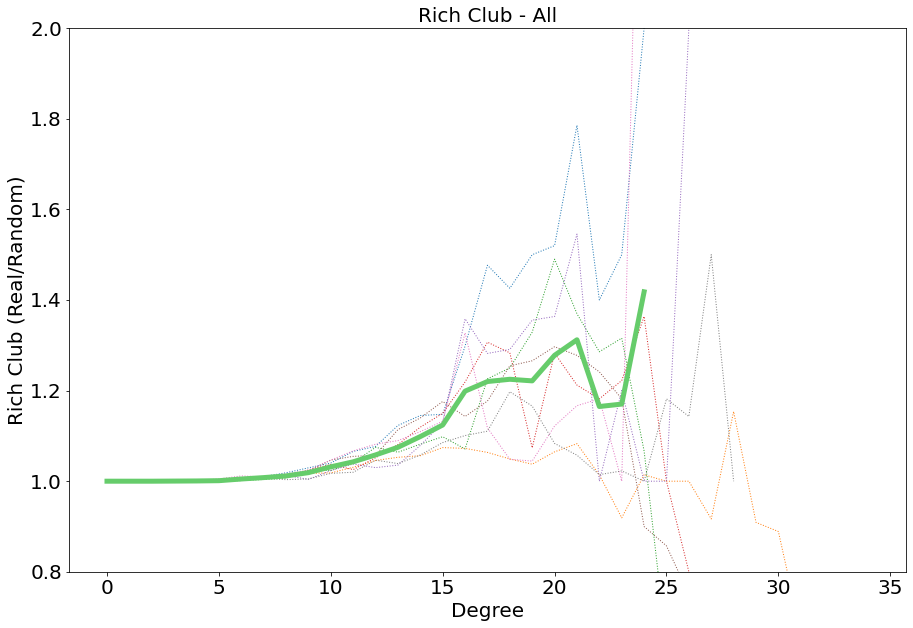

In [13]:
save_bool = True # if you want to save and overwrite 

# load the RC documentation
with open(GIT_GRAPH_PATH + 'RichClubDoc.csv') as f:
    try:
        RichClubDoc = pd.read_csv(f)
    except:
            print("\tCould not load RichClubDoc!")

            

plt.figure(figsize=(15,10))

for sub in RichClubDoc.columns:
    plt.plot(RichClubDoc[sub], linestyle=':', linewidth=1)

plt.plot(RichClubDoc.mean(axis=1), linewidth=5, color=green)    

plt.title('Rich Club - All', fontsize=fontsize)
plt.xlabel('Degree', fontsize=fontsize)
plt.ylabel('Rich Club (Real/Random)', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylim(0.8,2)


if save_bool == True:
    # saving the figure
    try:
        plt.savefig(GIT_GRAPH_PATH + "RichClub_All.png",
                    format="PNG",
                    facecolor='white',
                    transparent=False)
    except:
        print("\tCould not save RichCLub_All as PNG!")



         

### Triangulation